<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment%206/ML_Assignmnt_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                              ***Assignment 6***

# **MODULES**

In [330]:
import numpy as np
import csv
import math
from math import sqrt
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import random
from sklearn.datasets import load_iris
import seaborn as sns
warnings.filterwarnings("ignore")
print("True")

True


In [335]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 9.0MB/s 


# **Iris Data Visualization**

In [337]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',  names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [338]:
X = dataset.iloc[:,0:4]
Y = pd.DataFrame(dataset.iloc[:,-1])

In [339]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [340]:
Y.head(10)

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


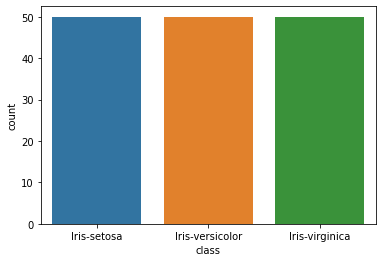

In [341]:
sns.countplot(Y['class'])
plt.show()

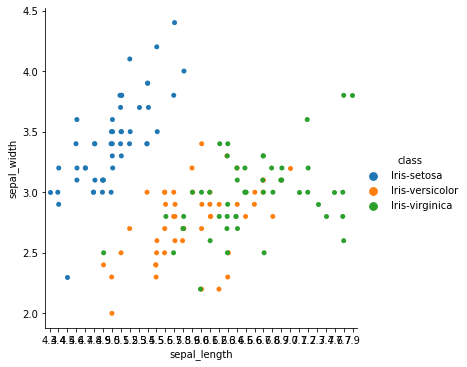

In [342]:
sns.catplot(data=X.join(Y),x='sepal_length',y='sepal_width',hue='class')
plt.show()

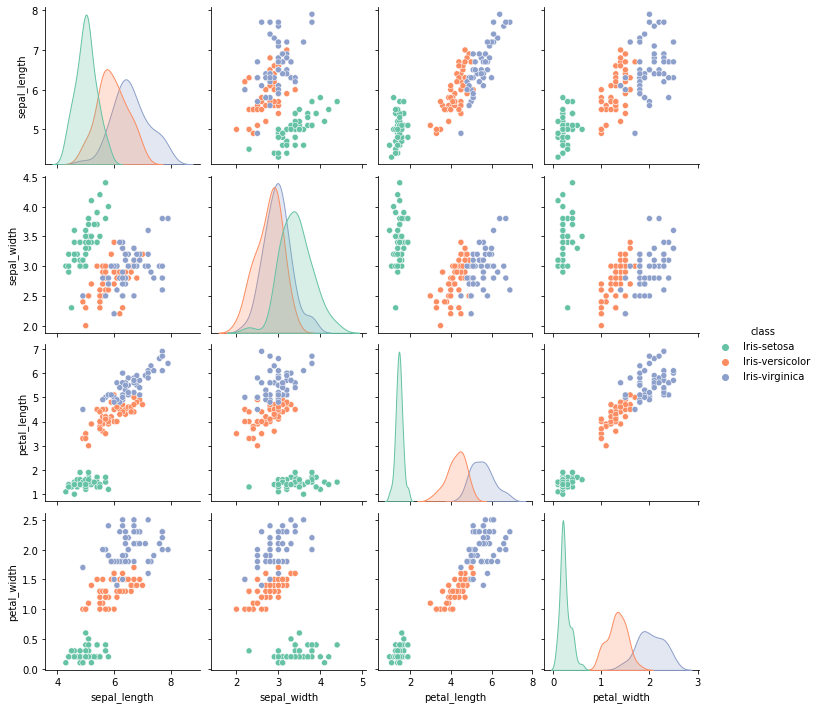

In [343]:
sns.pairplot(data=X.join(Y),hue='class',palette='Set2')
plt.show()

In [344]:
labels = {0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"}
lb = LabelEncoder()
Y['class'] = lb.fit_transform(Y)
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [345]:
writer1 = pd.ExcelWriter('SLP_Simulation.xlsx', engine='xlsxwriter')
writer2 = pd.ExcelWriter('MLP_Simulation.xlsx', engine='xlsxwriter')

# **Single layer perceptron for Iris Dataset**

In [356]:
#threshold Activation Function

def Activation(input,weight):
  total_sum=np.dot(input,weight[1:])+weight[0]
  if total_sum>0:
    activation=1
  else :
    activation=0
  return activation

In [357]:
#Train model
"""
For each epoch 
  each sample calculate the Activation and update the weight
"""

def Train_model(input,output,epoch,learning_rate):
  weight = []
  for i in range(input.shape[1]+1):
    weight.append(round(random.uniform(-0.3,0.3),2))

  for _ in range(epoch):
    for inputs,outputs in zip(input,output):
      activation=Activation(inputs,weight)
      sum = learning_rate * (outputs-activation)
      weight[1:]+=sum * inputs 
      weight[0]+=sum

  return weight

In [358]:
#prediction 

"""
this function take dataset and each class trained weight and after predicting value returns
highest value index(corresponds to class)
"""
def predict(X,w):
    Y_pred = np.empty((X.shape[0], 0))
    for i in range(len(w)):
        Y_pred = np.append(Y_pred, (np.dot(X, w[i])), axis=1)
    
    return np.argmax(Y_pred, axis=1).reshape(X.shape[0], 1)

In [359]:
#Finding Accuracy

def Accuracy(Y_pred,y):
    difference = Y_pred - np.array(y)
    num_correct = 0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            num_correct += 1

    score = num_correct * 100 / difference.size
    return score

In [360]:
"""
this function trains model for each class(one vs all) and predict the value for 
train and test data for finding Accuracy
"""

def find_score(x_train,y_train,class_values,x_test,y_test):

  #training the model for all the classes
  w_class1 = np.asarray(Train_model(x_train.to_numpy(),class_values[0],100,0.1))
  w_class2 = np.asarray(Train_model(x_train.to_numpy(),class_values[1],100,0.1))
  w_class3 = np.asarray(Train_model(x_train.to_numpy(),class_values[2],100,0.1))

  train_result = predict(x_train, [w_class1[1:].reshape(-1, 1), w_class2[1:].reshape(-1, 1), w_class3[1:].reshape(-1, 1)])
  train_score = Accuracy(train_result,y_train.to_numpy())
  
  test_result = predict(x_test, [w_class1[1:].reshape(-1, 1), w_class2[1:].reshape(-1, 1), w_class3[1:].reshape(-1, 1)])
  test_score = Accuracy(test_result,y_test.to_numpy())
  
  return train_score,test_score

In [361]:
"""
Driver function for a given train_size

1. splits datasets into train set and test set with given size
2. split model for each class into (one vs All) format
3. Calls Accuracy function
4. Runs simulation for 10 times
5. calculate average train and test Accuracy

"""
def split_for_score(X,Y,size):
  train_acc , test_acc = 0,0
  df = pd.DataFrame(columns=['Train Accuracy','Test Accuracy'])
  for i in range(10):

    x_train,x_test,y_train,y_test = tts(X,Y,train_size=size)
    
    class_1 = np.where(y_train==0,1,0)
    class_2 = np.where(y_train==1,1,0)
    class_3 = np.where(y_train==2,1,0)

    train_score , test_score = find_score(x_train,y_train,[class_1,class_2,class_3],x_test,y_test)
    df.loc[len(df.index)] = [train_score,test_score]
    train_acc +=train_score
    test_acc +=test_score
  df.to_excel(writer1,sheet_name='Train_size'+str(size*100))  
  return train_acc/10, test_acc/10

In [362]:
# storing for each train_size train accuracy and test Accuracy

training_Accuracy = []
testing_Accuracy = []

* **For Training Data(10%)**

In [363]:
#for training size 10%

train_size = 0.1

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 10.0% is : 80.00%
Testing Accuracy for the Train_size = 10.0% is : 70.22%


* **For Training Data(20%)**

In [364]:
#for training size 20%

train_size = 0.2

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 20.0% is : 71.67%
Testing Accuracy for the Train_size = 20.0% is : 72.25%


* **For Training Data(30%)**

In [365]:
#for training size 30%


train_size = 0.3

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 30.0% is : 67.56%
Testing Accuracy for the Train_size = 30.0% is : 70.29%


* **For Training Data(40%)**

In [366]:
#for training size 40%


train_size = 0.4

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 40.0% is : 72.33%
Testing Accuracy for the Train_size = 40.0% is : 70.67%


* **For Training Data(50%)**

In [367]:
#for training size 50%

train_size = 0.5

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 50.0% is : 75.20%
Testing Accuracy for the Train_size = 50.0% is : 72.27%


* **For Training Data(60%)**

In [368]:
#for training size 60%

train_size = 0.6

train_acc , test_acc = split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

Training Accuracy for the Train_size = 60.0% is : 69.78%
Testing Accuracy for the Train_size = 60.0% is : 73.33%


In [369]:
print(training_Accuracy)
print(testing_Accuracy)

[80.0, 71.66666666666667, 67.55555555555556, 72.33333333333334, 75.2, 69.77777777777777]
[70.22222222222223, 72.25000000000001, 70.28571428571428, 70.66666666666667, 72.26666666666668, 73.33333333333334]


* **Overall Table**

In [370]:
#table of all outcomes

Amount_of_training_data = ['10%','20%','30%','40%','50%','60%']
Table = pd.DataFrame()
Table['Amount_of_training_data'] = Amount_of_training_data 
Table['Training Accuracy'] = training_Accuracy
Table['Test Accuracy'] = testing_Accuracy 
Table.to_csv('table_data.csv')
Table

,Amount_of_training_data,Training Accuracy,Test Accuracy
0,10%,80.000000,70.222222
1,20%,71.666667,72.250000
2,30%,67.555556,70.285714
3,40%,72.333333,70.666667
4,50%,75.200000,72.266667
5,60%,69.777778,73.333333


* **Plotting curve**

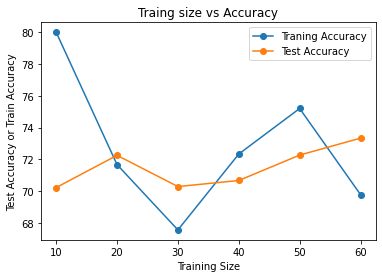

In [371]:
#graph between  training Accuracy vs train_size and testing Accuracy vs train_size


x_axis = [10,20,30,40,50,60]
plt.plot(x_axis,training_Accuracy,'o-',label='Traning Accuracy')
plt.plot(x_axis,testing_Accuracy,'o-',label='Test Accuracy')
plt.title("Traing size vs Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Test Accuracy or Train Accuracy")
plt.legend()
plt.show()

In [372]:
writer1.save()

# **Multi layer perceptron for Iris Dataset**

In [373]:
#Activation function

def sigmoid(Z):
  return 1/(1+np.exp(-Z))

In [374]:
#for back propagation sigmoid derivative

def derivative_sigmoid(dA ,Z):
  return dA * sigmoid(Z) * (1 - sigmoid(Z))

In [375]:
def linear_backward(dZ,input,weight,bias):
    '''
    Function to find derivatives of parameters
    '''
    m = input.shape[1]
    #print(m)

    dW = np.dot(dZ, input.T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(weight.T, dZ)
    try:
      db = db.reshape(-1, 1)
    except:
      db = [[db]]
    
    return dA_prev, dW, db

In [376]:
def linear_activation_backward(dA, cache,input,weight,bias):   
    
    dZ = derivative_sigmoid(dA,cache)
    
    dA_prev, dW, db = linear_backward(dZ,input,weight,bias) 
    return dA_prev, dW, db

In [377]:
#train model


def Train_MLP(input,output,hidden_layer,epoch,learning_rate):


  """

  input nodes ----> hidden node -------> output node
                |                   |
                |                   |
                |                   |

              sigmoid activation       sigmoid Activation

  weight_1:  contains weight of each input nodes corresponding to each hidden 
  layer
  weight_2:  contains weight of each hidden layer to the output Node

  Bias are : bias_1 and bais_2
  for each epoch:


  1.forword propogations:
  ---->
                h1= sigmoid(input sample * weight of input layer to hidden layer +bias)
                out = sigmoid(h1 * weight of hidden layer to output + bias)

  ----->
  2.backword propogations:
  ------>
              


  ------>
  3. update weight 
  """

  parameters = {}
 
  weight_1 = np.random.randn(hidden_layer,input.T.shape[1]) * 0.01  #for input layer
  weight_2 = np.random.randn(output.T.shape[1],hidden_layer) * 0.01  #for hidden layer
  input_bias = np.random.randn(hidden_layer,1) * 0.01
  hidden_bias = np.random.randn(output.T.shape[1],1) * 0.01

  for i in range(epoch):

    #forword propagation

    """ for input layer  and output layer

    we will use sigmoid function

    """
    
    Z = np.dot(weight_1,input) + input_bias
    A1 = sigmoid(Z)
    Z1 = np.dot(weight_2,A1) + hidden_bias
    A2 = sigmoid(Z1)

    #backword propogation

    
    m= len(output.T)

    dA2  = output-A2
    dA1, dW2, db2 = linear_activation_backward(dA2, Z1,A1,weight_2,hidden_bias)
    dA0, dW1, db1 = linear_activation_backward(dA1, Z,input,weight_1,input_bias)

    weight_1 = weight_1 + learning_rate * dW1 
    input_bias = input_bias + learning_rate * db1 
    weight_2 = weight_2 + learning_rate * dW2 
    hidden_bias = hidden_bias + learning_rate * db2 

   
  parameters = { "W1": weight_1,
                  "b1": input_bias,
                  "W2": weight_2,
                  "b2": hidden_bias}
  return parameters

In [378]:
#prediction for a input

def model_test(X,cache):

  Z = np.dot(cache["W1"],X) + cache['b1']
  As = sigmoid(Z)
  Z1 = np.dot(cache["W2"],As) + cache["b2"]
  ar = sigmoid(Z1)

  return ar

In [379]:
#multiple prediction

"""
for  all group data 
"""
def predict_MLP(X, parameters):
    '''
    Function to predict test set for multiple classes
    '''
    prob0 = model_test(X, parameters[0])[0].reshape(-1, 1)
    prob1 = model_test(X, parameters[1])[0].reshape(-1, 1)
    prob2 = model_test(X, parameters[2])[0].reshape(-1, 1)
    
    predictions = np.hstack((prob0, prob1, prob2))
    #print(predictions)
    
    return np.argmax(predictions, axis=1).reshape(X.shape[1], 1)

In [380]:
#Accuracy function

def score_MLP(result,label):
    '''
    Function to find score of our predicted output
    '''
    difference = result - np.array(label)
    num_correct = 0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            num_correct += 1

    score = num_correct * 100 / difference.size
    return score

In [381]:
"""
training model for each group(one vs All)
and predicting outcomes and accuracy
"""
def MLP_train_test_score(x_train, y_train, y_class, x_test, y_test):

  hidden_layer = 5

  parameter0 = Train_MLP(x_train.T, y_class[0].T,hidden_layer,1000,0.5)
  parameter1 = Train_MLP(x_train.T, y_class[1].T,hidden_layer,1000,0.5)
  parameter2 = Train_MLP(x_train.T, y_class[2].T,hidden_layer,1000,0.5)

  train_prediction = predict_MLP(x_train.T, [parameter0, parameter1, parameter2])
  train_score = score_MLP(train_prediction, y_train.to_numpy())

  test_prediction = predict_MLP(x_test.T, [parameter0, parameter1, parameter2])
  test_score = score_MLP(test_prediction, y_test.to_numpy())

  return train_score, test_score

In [382]:
"""
Driver function for a given train_size

1. splits datasets into train set and test set with given size
2. split model for each class into (one vs All) format
3. Calls Accuracy function
4. Runs simulation for 10 times
5. calculate average train and test Accuracy

"""
def MLP_split_for_score(X,Y,size):
  train_score, test_score = 0,0
  df = pd.DataFrame(columns=['Train Accuracy','Test Accuracy'])
  for i in range(10):
    X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=size)

    y_class0 = np.where(Y_train == 0, 1, 0)
    y_class1 = np.where(Y_train == 1, 1, 0)
    y_class2 = np.where(Y_train == 2, 1, 0)
    
    
    score_train, score_test = MLP_train_test_score(X_train, Y_train, [y_class0, y_class1, y_class2], X_test, Y_test)
    df.loc[len(df.index)] = [score_train,score_test]
    train_score += score_train
    test_score += score_test
  df.to_excel(writer2,sheet_name='Train_size'+str(size*100)) 
  return train_score/10, test_score/10

In [383]:
MLP_training_Acc = []
MLP_testing_Acc = []

* **FOR TRAINING DATA 10%**

In [384]:
train_size = 0.1

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 10.0% is : 92.67%
Testing Accuracy for the Train_size = 10.0% is : 81.85%


* **FOR TRAINING DATA 20%**

In [385]:
train_size = 0.2

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 20.0% is : 95.67%
Testing Accuracy for the Train_size = 20.0% is : 94.08%


* **FOR TRAINING DATA 30%**

In [386]:
train_size = 0.3

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 30.0% is : 96.89%
Testing Accuracy for the Train_size = 30.0% is : 95.81%


* **FOR TRAINING DATA 40%**

In [387]:
train_size = 0.4

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 40.0% is : 96.83%
Testing Accuracy for the Train_size = 40.0% is : 96.67%


* **FOR TRAINING DATA 50%**

In [388]:
train_size = 0.5

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 50.0% is : 96.40%
Testing Accuracy for the Train_size = 50.0% is : 92.67%


* **FOR TRAINING DATA 60%**

In [389]:
train_size = 0.6

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("Training Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,train_acc))

print("Testing Accuracy for the Train_size = {}% is : {:.2f}%".format(train_size*100,test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

Training Accuracy for the Train_size = 60.0% is : 97.44%
Testing Accuracy for the Train_size = 60.0% is : 97.00%


In [390]:
print(MLP_training_Acc)
print(MLP_testing_Acc)

[92.66666666666666, 95.66666666666666, 96.88888888888889, 96.83333333333334, 96.39999999999999, 97.44444444444443]
[81.85185185185185, 94.08333333333334, 95.80952380952382, 96.66666666666666, 92.66666666666666, 97.00000000000001]


* **FINAL OUTCOME TABLE**

In [391]:
# final outcome table

Amount_of_training_data = ['10%','20%','30%','40%','50%','60%']
Table = pd.DataFrame()
Table['Amount_of_training_data'] = Amount_of_training_data 
Table['Training Accuracy'] = MLP_training_Acc
Table['Test Accuracy'] = MLP_testing_Acc 
Table.to_csv('MLP_table_data.csv')
Table

,Amount_of_training_data,Training Accuracy,Test Accuracy
0,10%,92.666667,81.851852
1,20%,95.666667,94.083333
2,30%,96.888889,95.809524
3,40%,96.833333,96.666667
4,50%,96.400000,92.666667
5,60%,97.444444,97.000000


* **PLOTTING CURVE BETWEEN TRAINING DATA SIZE VS TEST AND TRAIN ACCURACY**

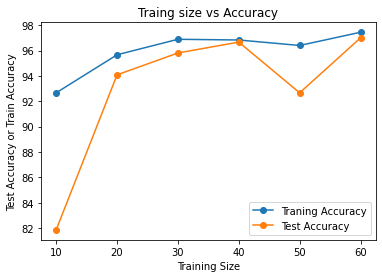

In [392]:
# graph between training data size vs (test accuracy and train accuracy)

x_axis = [10,20,30,40,50,60]
plt.plot(x_axis,MLP_training_Acc,'o-',label='Traning Accuracy')
plt.plot(x_axis,MLP_testing_Acc,'o-',label='Test Accuracy')
plt.title("Traing size vs Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Test Accuracy or Train Accuracy")
plt.legend()
plt.show()

In [393]:
writer2.save()